In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#exploring the loan dataset
dataset = pd.read_csv("loan_data.csv")

dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#checking for missing values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#checking for duplicates
dataset.duplicated().sum()

0

In [6]:
#creating a dictionary to replace missing values
replace_values = {
    'Gender': dataset['Gender'].mode()[0], 
    'Married': dataset['Married'].mode()[0],
    'Dependents': dataset['Dependents'].mode()[0],
    'Self_Employed': dataset['Self_Employed'].mode()[0],
    'LoanAmount': dataset['LoanAmount'].mean(),
    'Loan_Amount_Term': dataset['Loan_Amount_Term'].mean(),
    'Credit_History': 0,
}

In [7]:
# replacing the missing values
new_df = dataset.fillna(replace_values)

new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [8]:
#checking that there are no null values
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
new_df.shape

(614, 13)

In [10]:
#encoding categorical variables
new_df.replace({"Loan_Status":{"N":0,"Y":1},
                   'Married':{'No':0,"Yes":1},
                   'Gender':{'Male':1,'Female':0}, 
                   'Self_Employed':{'No':0,'Yes':1},
                   'Property_Area':{'Rural':0,"Semiurban":1,'Urban':2},
                   'Education':{'Graduate':1,'Not Graduate':0}
                  }, inplace=True)

new_df.replace(to_replace="3+", value=4, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14372\2062413972.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.replace({"Loan_Status":{"N":0,"Y":1},


In [11]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


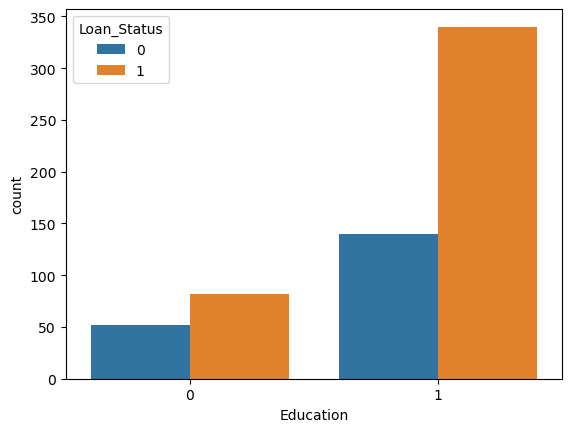

In [12]:
#some visualizations
sns.countplot(x='Education', hue='Loan_Status', data=new_df)
plt.show()

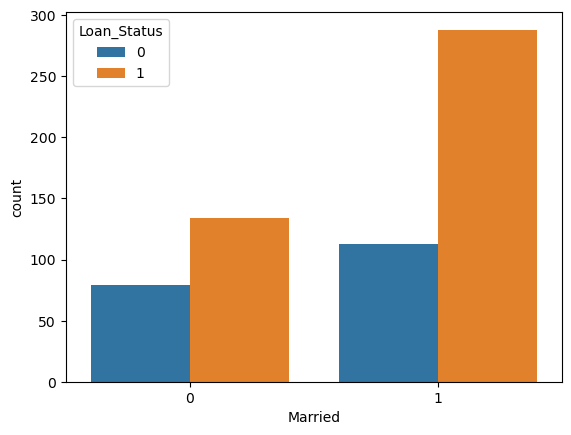

In [13]:
sns.countplot(x='Married', hue='Loan_Status', data=new_df)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

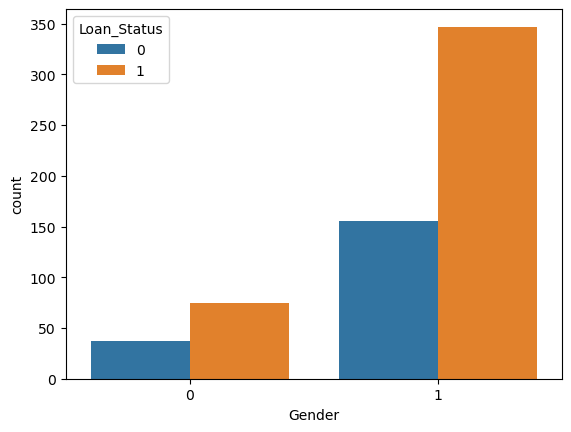

In [14]:
sns.countplot(x='Gender', hue='Loan_Status', data=new_df)

In [16]:
#separating the data into X and y
X = new_df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = new_df['Loan_Status']

In [17]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [18]:
# first model: LogisticRegression
lr_pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(max_iter=200))        
])
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=200))])

In [19]:
print(X_train.shape, X_test.shape)

(552, 11) (62, 11)


In [20]:
#checking the prediction and accuracy plus other metrics
y_pred =lr_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nclassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7741935483870968

classification report:
               precision    recall  f1-score   support

           0       0.77      0.48      0.59        21
           1       0.78      0.93      0.84        41

    accuracy                           0.77        62
   macro avg       0.77      0.70      0.72        62
weighted avg       0.77      0.77      0.76        62


Confusion Matrix:
 [[10 11]
 [ 3 38]]


In [21]:
import joblib

joblib.dump(lr_pipeline, 'lr.joblib')

['lr.joblib']

In [17]:
# second model: Decision Tree
dt_pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("dt", DecisionTreeClassifier(max_depth=3, random_state=42))
])
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))])

In [18]:
#checking the prediction and accuracy plus other metrics
y_pred =dt_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nclassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7419354838709677

classification report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56        21
           1       0.77      0.88      0.82        41

    accuracy                           0.74        62
   macro avg       0.72      0.68      0.69        62
weighted avg       0.73      0.74      0.73        62


Confusion Matrix:
 [[10 11]
 [ 5 36]]


In [19]:
#saving the decision tree model
import joblib

joblib.dump(dt_pipeline, 'dt_clf.joblib')

['dt_clf.joblib']

In [22]:
#predicting with different values
new_data = pd.DataFrame({
    'Gender': [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [1000],
    'Loan_Amount_Term': [200],
    'Credit_History': [1],
    'Property_Area': [2]
})

prediction = lr_pipeline.predict(new_data)
print(f"Prediction for new data: {'YES' if prediction[0] == 1 else 'NO'}")

Prediction for new data: YES


In [23]:
pred_probability = lr_pipeline.predict_proba(new_data)
pred_probability

array([[0.37478944, 0.62521056]])

In [24]:
#making some predictions with certain values
new_data = pd.DataFrame({
    'Gender': [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [1000],
    'Loan_Amount_Term': [200],
    'Credit_History': [0],
    'Property_Area': [2]
})

prediction = lr_pipeline.predict(new_data)
print(f"Prediction for new data: {'YES' if prediction[0] == 1 else 'NO'}")

Prediction for new data: NO


In [25]:
pred_probability = lr_pipeline.predict_proba(new_data)
pred_probability

array([[0.83314289, 0.16685711]])